Linear Regression

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2023-03-10 07:17:12--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-03-10 07:17:12 (24.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [10]:
!ls

moore.csv  sample_data


Load dataset

In [12]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [14]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [67]:
x = data[:, 0].reshape(-1, 1) #making N x D
y = data[:, 1]

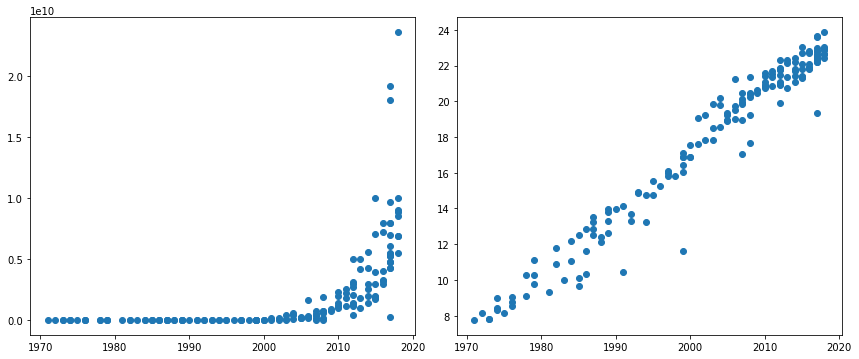

In [68]:
#Plot the data
#define subplots
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.tight_layout()
#indicating exponential growth
ax[0].scatter(x, y);

#Taking Log
y = np.log(y)
ax[1].scatter(x, y);

Scale the data : years

In [69]:
x = x - x.mean()

Create Model

In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1),
])

Compile the Model訓練の定義

In [86]:
#If I had standarized data before I could just use Adom for optimized but I will need to retransform later
model.compile(tf.keras.optimizers.SGD(0.001, 0.9),
              loss='MSE'
              )

Learning Rate Scheduler

In [87]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  else:
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

Train the model

In [88]:
r = model.fit(x, y, epochs=80, callbacks=[scheduler])

Epoch 1/80
6/6 [==============================] - 1s 4ms/step - loss: 374.0276 - lr: 0.0010
Epoch 2/80
6/6 [==============================] - 0s 5ms/step - loss: 366.7261 - lr: 0.0010
Epoch 3/80
6/6 [==============================] - 0s 3ms/step - loss: 378.9978 - lr: 0.0010
Epoch 4/80
6/6 [==============================] - 0s 5ms/step - loss: 372.0205 - lr: 0.0010
Epoch 5/80
6/6 [==============================] - 0s 4ms/step - loss: 384.2593 - lr: 0.0010
Epoch 6/80
6/6 [==============================] - 0s 3ms/step - loss: 274.6299 - lr: 0.0010
Epoch 7/80
6/6 [==============================] - 0s 4ms/step - loss: 121.8008 - lr: 0.0010
Epoch 8/80
6/6 [==============================] - 0s 5ms/step - loss: 97.3268 - lr: 0.0010
Epoch 9/80
6/6 [==============================] - 0s 6ms/step - loss: 57.2017 - lr: 0.0010
Epoch 10/80
6/6 [==============================] - 0s 4ms/step - loss: 42.9923 - lr: 0.0010
Epoch 11/80
6/6 [==============================] - 0s 5ms/step - loss: 33.3926 - l

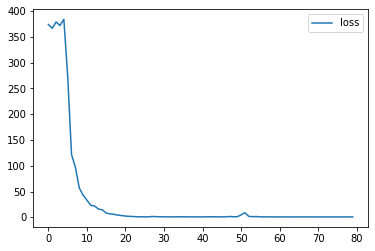

In [89]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [91]:
model.layers

In [95]:
model.layers[0].get_weights()

[array([[0.35318157]], dtype=float32), array([17.763313], dtype=float32)]

In [97]:
a = model.layers[0].get_weights()[0][0, 0]
a

0.35318157